In [82]:
import pandas as pd

In [83]:
import numpy as np

In [84]:
import seaborn as sns

In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')

In [86]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_quest = df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]
df_quest.describe().columns

Index(['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '재발여부'], dtype='object')

### 범주형데이터

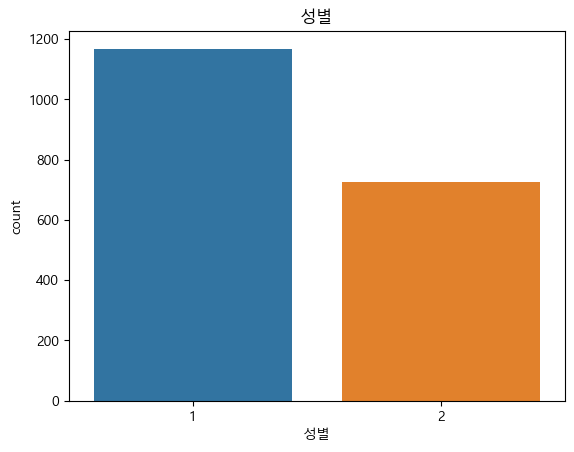

In [87]:
# 성별 차트
sns.countplot(data=df_quest, x= '성별')
plt.title('성별')
plt.show()

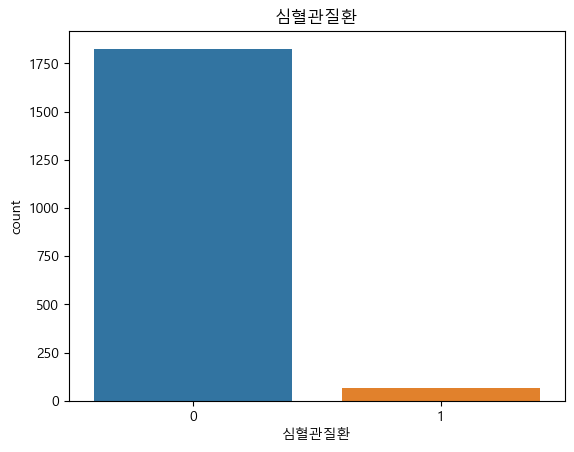

In [88]:
# 심혈관질환 차트
sns.countplot(data=df_quest, x= '심혈관질환')
plt.title('심혈관질환')
plt.show()

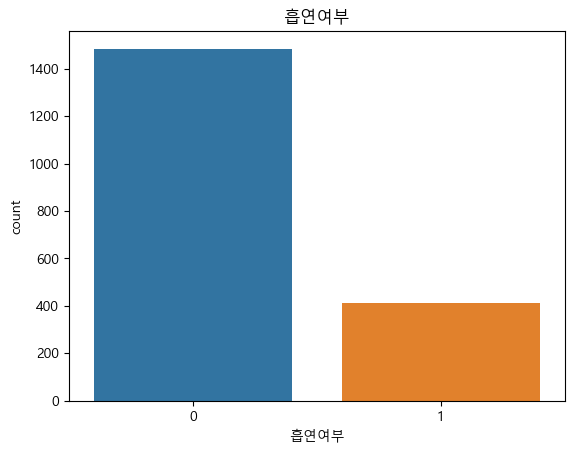

In [89]:
# 흡연여부 차트
sns.countplot(data=df_quest, x= '흡연여부')
plt.title('흡연여부')
plt.show()

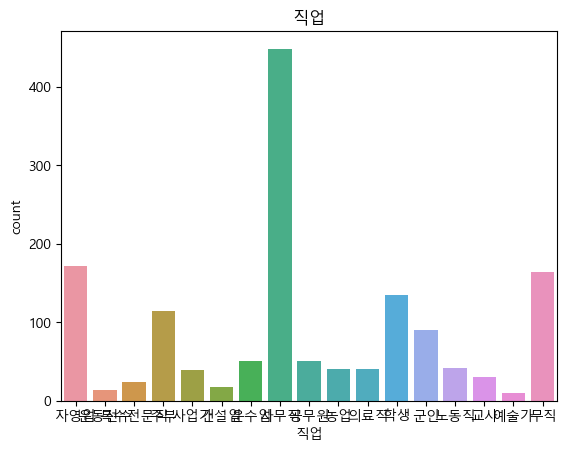

In [90]:
# 직업 차트
sns.countplot(data=df_quest, x= '직업')
plt.title('직업')
plt.show()

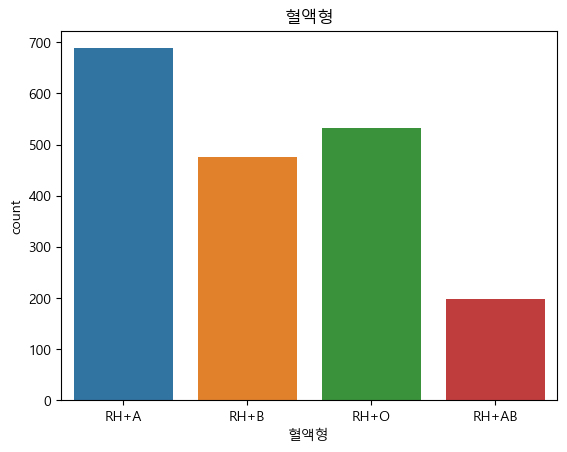

In [91]:
# 혈액형 차트
sns.countplot(data=df_quest, x= '혈액형')
plt.title('혈액형')
plt.show()

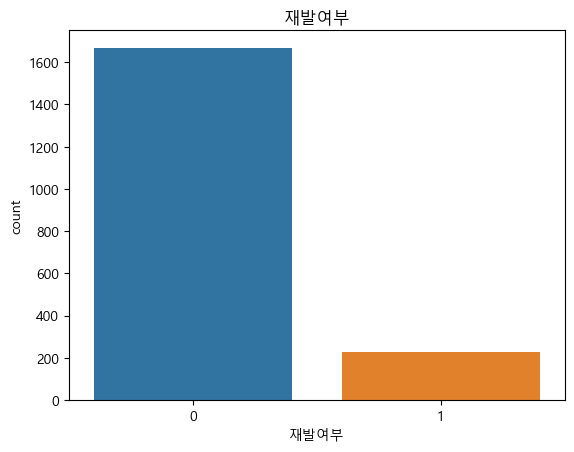

In [92]:
# 재발여부 차트
sns.countplot(data=df_quest, x='재발여부')
plt.title('재발여부')
plt.show()

### 연속형데이터

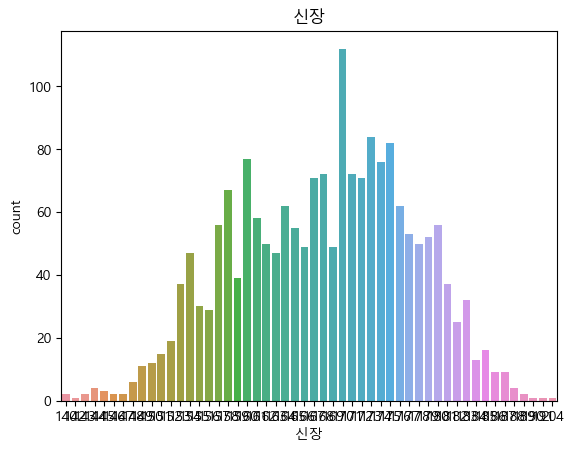

In [127]:
#신장 차트
sns.countplot(data=df_quest, x= '신장')
plt.title('신장')
plt.show()

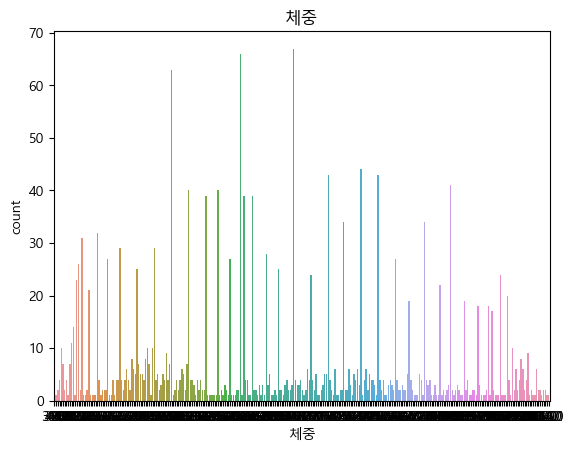

In [93]:
# 체중 차트
sns.countplot(data=df_quest, x= '체중')
plt.title('체중')
plt.show()

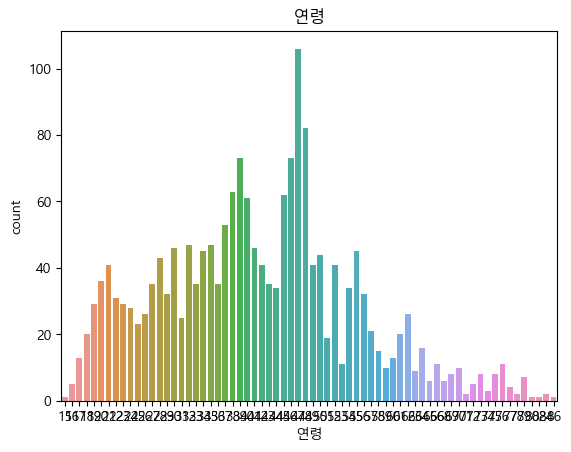

In [94]:
# 연령 차트
sns.countplot(data=df_quest, x= '연령')
plt.title('연령')
plt.show()

## 연속형데이터에서 이상치와 결측치 제거

### 전체 데이터에서 결측치 제거

In [95]:
df_quest.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [96]:
df_quest_dropna = df_quest.dropna()
df_quest_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


### 신장에서 이상치 제거

In [130]:
height_Q1 = df_quest_dropna['신장'].describe()['25%']
height_Q3 = df_quest_dropna['신장'].describe()['75%']
height_IQR = height_Q3 - height_Q1

In [131]:
height_Q1, height_Q3, height_IQR

(161.0, 175.0, 14.0)

In [132]:
height_bound_up = height_Q3 + 1.5 * height_IQR
height_bound_down = height_Q1 - 1.5 * height_IQR
height_bound_up, height_bound_down

(196.0, 140.0)

In [133]:
# filter
height_condition = (df_quest_dropna['신장'] <= height_bound_up) & (df_quest_dropna['신장'] >= height_bound_down)
df_quest_height = df_quest_dropna[height_condition]

<function matplotlib.pyplot.show(close=None, block=None)>

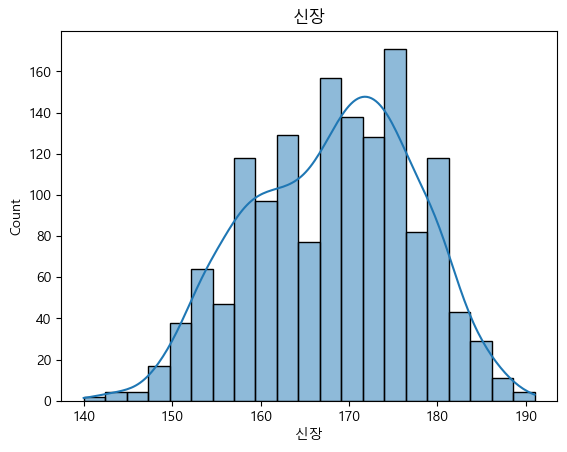

In [134]:
sns.histplot(data=df_quest_height, x='신장', kde=True)
plt.title('신장')
plt.show

<Axes: xlabel='신장'>

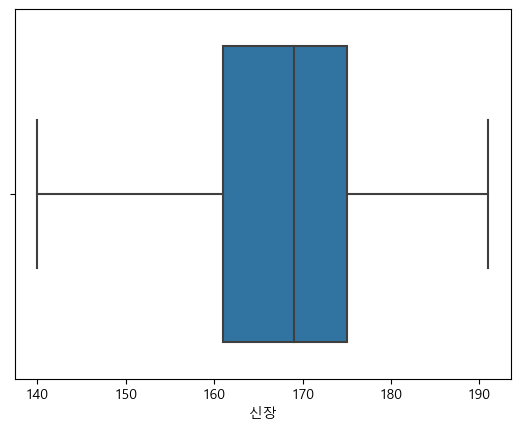

In [135]:
sns.boxplot(df_quest_height, x='신장')

### 체중에서 이상치 제거

In [97]:
Q1 = df_quest_dropna['체중'].describe()['25%']
Q3 = df_quest_dropna['체중'].describe()['75%']
IQR = Q3 - Q1

In [98]:
Q1, Q3, IQR

(60.0, 75.15, 15.150000000000006)

In [99]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_up, bound_down

(97.87500000000001, 37.27499999999999)

In [100]:
# filter
condition = (df_quest_dropna['체중'] <= bound_up) & (df_quest_dropna['체중'] >= bound_down)
df_quest_weight = df_quest_dropna[condition]

<function matplotlib.pyplot.show(close=None, block=None)>

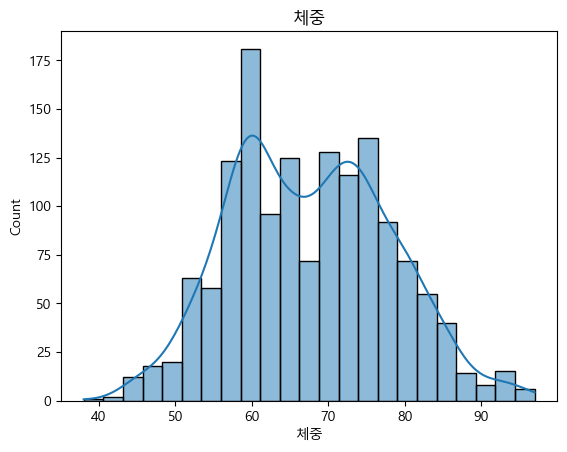

In [101]:
sns.histplot(data=df_quest_weight, x='체중', kde=True)
plt.title('체중')
plt.show

<Axes: xlabel='체중'>

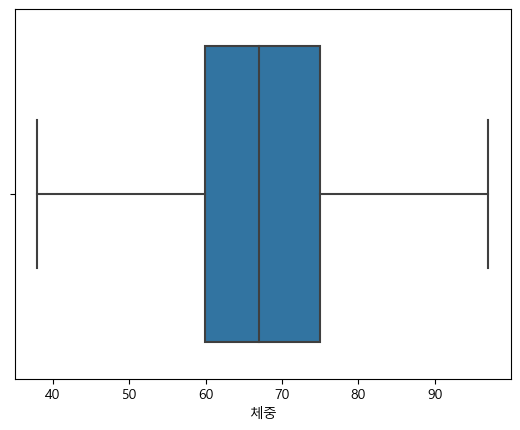

In [102]:
sns.boxplot(df_quest_weight, x='체중')

### 연령에서 이상치 제거

In [103]:
age_Q1 = df_quest_dropna['연령'].describe()['25%']
age_Q3 = df_quest_dropna['연령'].describe()['75%']
age_IQR = age_Q3 - age_Q1

In [104]:
age_Q1, age_Q3, age_IQR

(30.0, 47.0, 17.0)

In [105]:
age_bound_up = Q3 + 1.5 * IQR
age_bound_down = Q1 - 1.5 * IQR
age_bound_up, age_bound_down

(97.87500000000001, 37.27499999999999)

In [106]:
condition = (df_quest_dropna['연령'] <= age_bound_up) & (df_quest_dropna['연령'] >= age_bound_down)
df_quest_age = df_quest_dropna[condition]

<function matplotlib.pyplot.show(close=None, block=None)>

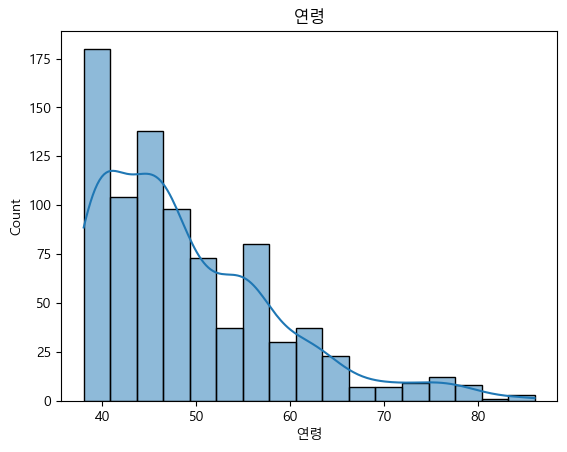

In [107]:
sns.histplot(data=df_quest_age, x='연령', kde=True)
plt.title('연령')
plt.show

<Axes: xlabel='연령'>

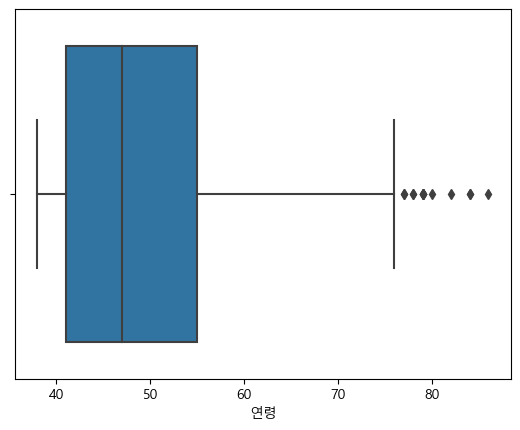

In [108]:
sns.boxplot(df_quest_age, x='연령')

In [109]:
df_quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [110]:
df_quest['연령'].describe()

count    1894.000000
mean       41.463569
std        13.444629
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        86.000000
Name: 연령, dtype: float64

In [111]:
condition = (df_quest['연령'] >= 50) & (df_quest['연령'] <= 59)
df_quest[condition]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
7,1,183,0,81.2,1,55,NaN,RH+B,0
8,1,168,0,69.2,1,52,NaN,RH+A,0
14,2,158,0,58.4,1,56,NaN,RH+O,0
20,1,166,0,68.3,0,56,운수업,RH+A,0
21,2,158,0,58.6,0,56,운수업,RH+AB,0
...,...,...,...,...,...,...,...,...,...
1877,1,180,0,78.0,1,51,농업,RH+AB,0
1883,1,174,0,66.0,0,56,자영업,RH+O,1
1884,2,156,0,52.0,1,56,농업,RH+A,1
1888,1,165,0,63.0,0,59,자영업,RH+A,0


##### 연령이 중앙값과 Q3 사이

In [125]:
medium_age = np.mean(df_quest['연령'])
age_between_condition = (df_quest['연령'] >= medium_age) & (df_quest['연령'] <= age_Q3)
age_between_condition.sum()

351